In [1]:
from math import pi, exp
import numpy as np
import matplotlib.pyplot as plt

# Task 2: Astrophysical Absorption Line Exercise
***
Next task is to generate a spectrum of light after it has passed through a slab of gas, and
investigate the Lyman α absorption line of hydrogen. The part below shows how you can
calculate a spectrum and the necessary information to complete the 3 subtasks.

### Providing constant features

In [2]:
# gas slab properties
nH = 0.1 
x = 0.1
# hydrogen properties
v0 = 2.46607e15
L = 6.265e8
f = 0.4164
g0 = 2.0
Z = 2.0
# physical constants
me = 9.11e-28
c = 3.00e10
e = 4.80e-10

### Methods for calculations

In [3]:
def calculate_absorption_coeff(v, v0):
    first = (e ** 2 * f  * nH) / (4 * pi * me * c)
    second = ((1 - x) * g0) / (Z)
    third = (L) / ((v - v0) ** 2 + (L / 4 * pi) ** 2)
    
    absorption_coeff = first * second * third
    return absorption_coeff

In [4]:
def calculate_intensity(d, wavelength, v0):
    # using v = c / wavelength formula
    v = c / wavelength
    # calculating absorption coefficent 
    absorption_coeff = calculate_absorption_coeff(v, v0)
    # calculate intensity with absorption coefficient
    intensity = exp(-absorption_coeff * d)
    return intensity

### Method for generating and plotting spectrum

In [5]:
# Reference: https://en.wikipedia.org/wiki/Lyman-alpha_line
# I have read that page and decided to pick wavelength start in 1200
def plot_spectrum(d, v0, wavelength_start=1200, wavelength_end=1240, num=100000):
    # generate wavelengths with np.linspace
    wavelengths = np.linspace(wavelength_start, wavelength_end, num)
    # store the intensities that we're going to calculate
    intensities = []
    # calculate intensities for certain wavelength 
    for wavelength in wavelengths:
        # we're going to use  wavelength / 10 ** 8 because 
        # we want to represent our wavelength in Angstrom.
        intensities.append(calculate_intensity(d, wavelength / 10 ** 8, v0))
    
    # plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(wavelengths, intensities)
    plt.title("Light Intensity vs Wavelength")
    plt.xlabel("Wavelengths (Angstrom)")
    plt.xticks(np.arange(wavelength_start, wavelength_end, 2), rotation=90)
    plt.ylabel("Intensities")
    plt.grid()
    
    # find minimum intensity of plotting
    min_intesity = min(intensities)
    index_min_intesity = intensities.index(min_intesity)
    # find wavelength that created minimum intensity
    min_intensity_wavelength = wavelengths[index_min_intesity]
    
    # Print-out some information.
    print("Minimum intensity: {0}".format(min_intesity))
    print("Minimum insensity's wavelength: {0}".format(min_intensity_wavelength))
    print("d: {0} \t v0: {1}".format(d, v0))

### Subtask 2.1
---

We need to generate spectrum with:  
d equals $ 10^{14}, 10^{18}, 10^{21} $ and   
v0 equals $ 2.46607 * 10 ^ {15} $

Minimum intensity: 6.673493654441234e-26
Minimum insensity's wavelength: 1216.510565105651
d: 1000000000000000.0 	 v0: 2466070000000000.0


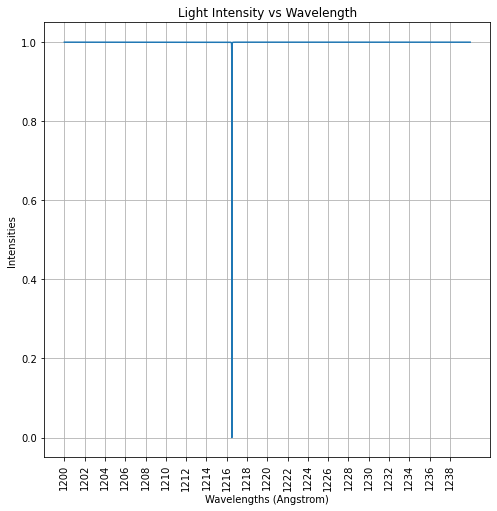

In [6]:
d_list = [10e14, 10e18, 10e21]
plot_spectrum(d_list[0], v0)

Minimum intensity: 0.0
Minimum insensity's wavelength: 1216.5033650336504
d: 1e+19 	 v0: 2466070000000000.0


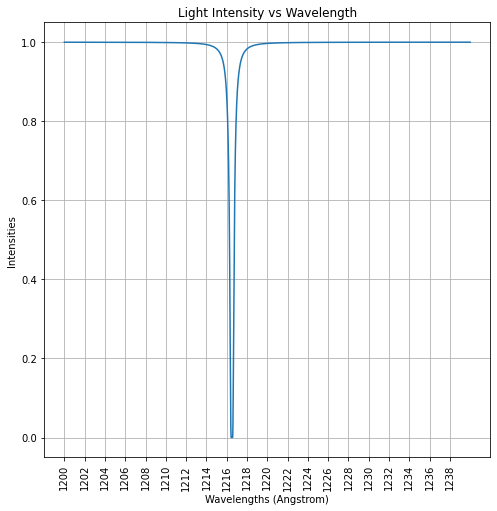

In [7]:
plot_spectrum(d_list[1], v0)

Minimum intensity: 0.0
Minimum insensity's wavelength: 1216.2837628376283
d: 1e+22 	 v0: 2466070000000000.0


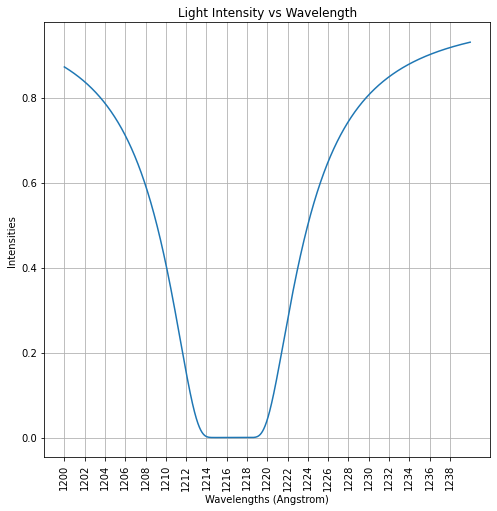

In [8]:
plot_spectrum(d_list[2], v0)

### Subtask 2.2
---

We need to generate spectrum with:  
d equals $ 10^{14}, 10^{18}, 10^{21} $ and   
v0 equals $ 2.46632 * 10 ^ {15} $

Minimum intensity: 7.887566410202593e-18
Minimum insensity's wavelength: 1216.3873638736388
d: 1000000000000000.0 	 v0: 2466320000000000.0


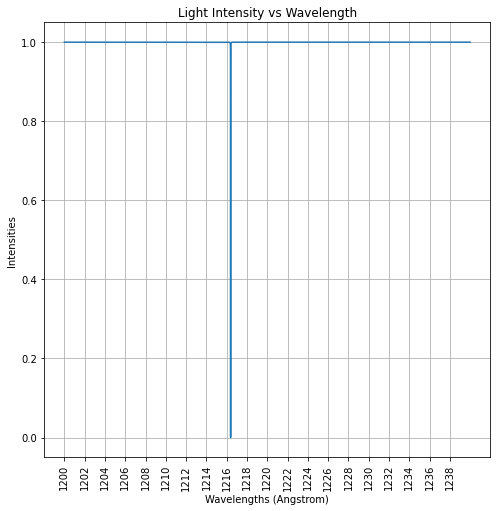

In [9]:
v0_new = 2.46632e15
plot_spectrum(d_list[0], v0_new)

Minimum intensity: 0.0
Minimum insensity's wavelength: 1216.380163801638
d: 1e+19 	 v0: 2466320000000000.0


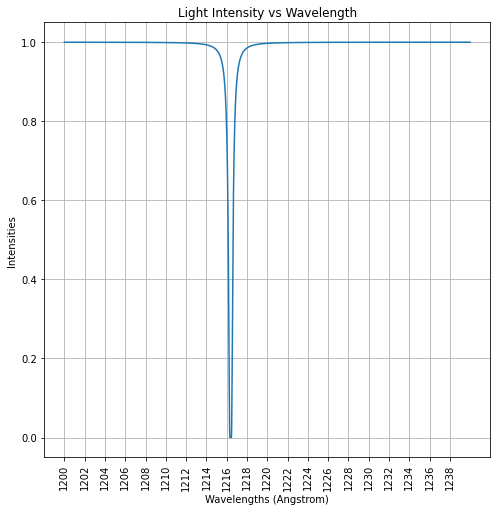

In [10]:
plot_spectrum(d_list[1], v0_new)

Minimum intensity: 0.0
Minimum insensity's wavelength: 1216.160561605616
d: 1e+22 	 v0: 2466320000000000.0


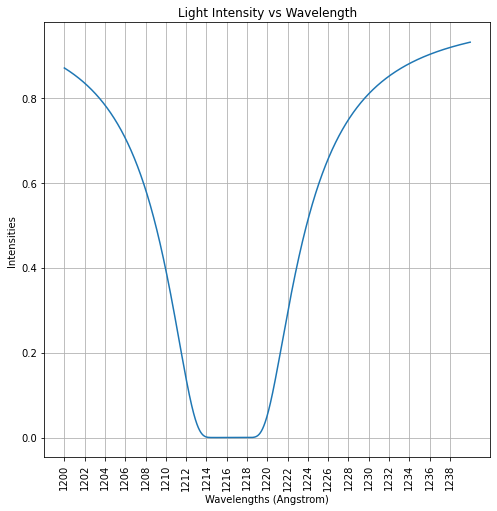

In [11]:
plot_spectrum(d_list[2], v0_new)

### Task 2.3 Commenting 

* Actually all graphics has 0 intensity. There is some very very very little values in some plottings but we can assume that they are 0. 


* All graphs has same shape.


* All graphs minimum intensity in specific wavelength and that that wavelength is 1216 Angstrom.


* When v0 = 2.46632e15 graphics tend to be get 0 intensity faster than v0 = v0 = 2.46607e15 value.


* When d increased more light gets absorbed.


* Lastly, understanding and proofing that Lyman alpha lines was interesting for me. I was scared at the beginning but now I can even comment about it.

